# M2S13.02: Exploring alternative clustering methods

## 02.1. Library loading

In [5]:
import scanpy as sc
import hdbscan

In [7]:
adata = sc.read_h5ad("01_object.h5ad")

/home/op/miniforge3/envs/py-M2S12/lib/python3.11/site-packages/anndata/compat/__init__.py:371: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [12]:
adata

AnnData object with n_obs × n_vars = 3567 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Selection', 'Location', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'SCT_snn_res.0.2', 'SCT_snn_res.0.4', 'SCT_snn_res.0.6', 'SCT_snn_res.0.8', 'SCT_snn_res.1', 'SCT_snn_res.1.2', 'SCT_snn_res.1.4', 'SCT_snn_res.1.6', 'SCT_snn_res.1.8', 'SCT_snn_res.2', 'hdbscan_clusters'
    var: 'features'
    uns: 'neighbors', 'hdbscan_clusters_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

## 02.2. HDBSCAN clustering

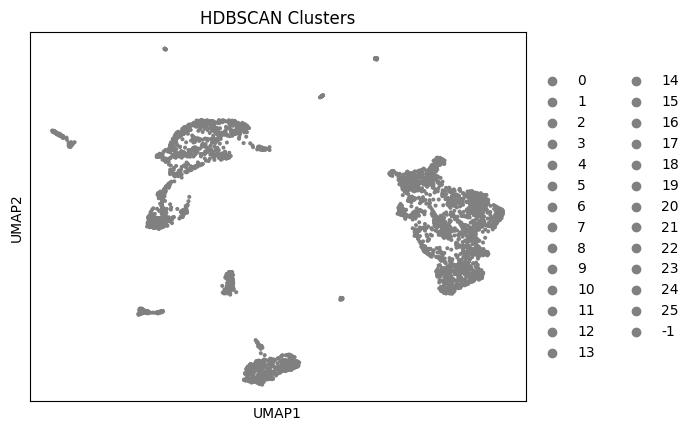

In [17]:
X = adata.obsm['X_umap']

clusterer = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=1, cluster_selection_method='eom')
clusters = clusterer.fit_predict(X)

adata.obs['hdbscan_clusters'] = clusters.astype(str)

sc.pl.umap(adata, color='hdbscan_clusters', title='HDBSCAN Clusters')

## 02.3. Exporting the clustered anndata object

In [18]:
if adata.raw is not None and '_index' in adata.raw.var.columns:
    adata.raw.var.drop(columns=['_index'], inplace=True)

adata.write("02_object_with_hdbscan.h5ad")
